<a href="https://colab.research.google.com/github/groom115/TASK1_Prediction-of-percentage-/blob/main/Task1_student_marks_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**The Sparks Foundation-GRIP- Data Science &Business Analyst Intern- November 2021**

**TASK 1 --> PREDICTION USING SUPERVISED ML**

**Author: Abhishek shyam**

Problem : Predict the percentage of student on numnber of study hours

Dataset Link: http://bit.ly/w-data

#**Import Libaries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  


#Load Dataset

In [4]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.shape

(25, 2)

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


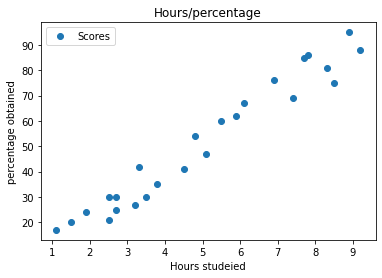

In [11]:
#plotting the datset

df.plot(x="Hours", y="Scores",style="o")
plt.title("Hours/percentage")
plt.xlabel('Hours studeied')
plt.ylabel('percentage obtained')
plt.show()

#**Preparing the Data**

In [12]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [13]:
df2=df.fillna(df.mean())
df2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
#defining x and y
x=df2.drop('Scores',axis="columns")
y=df2.drop("Hours",axis="columns")
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)

#**Training our Algorithm**

In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

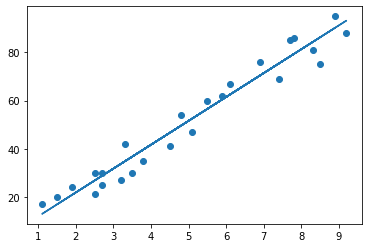

In [22]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

#**Making Predictions**

In [27]:
y_pred=regressor.predict(x_test);
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [40]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':[ y_test], 'Predicted':[ y_pred]})  
df 

,Actual,Predicted
0,Scores 5 20 2 27 19 69 16...,"[[16.884144762398023], [33.732260779489835], [..."


In [42]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


#**Evaluating Model**

In [43]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
